In [1]:
import pandas as pd

In [2]:
path = 'full_evaluation_sge-zh.csv'
auto_metrics = [
    'comet',
    'bertscore',
    'GPT_a',
    'GPT_f'
]
human_metrics = [
    'human_accuracy',
    'human_fluency',
    'human_code-mixedness'
]
params = [
    'method',
    'model',
    'direction'
]
          

In [3]:
df = pd.read_csv(path, index_col='id')
df

,src,tgt,generated,method,model,direction,comet,bertscore,GPT_a,GPT_f,human_accuracy,human_fluency,human_code-mixedness
id,,,,,,,,,,,,,
b19b9f8c-4c75-4429-b7e0-beef5506a4f5,"""I would've preferred it to have been a comple...",事后 这位 来自 威尔士 的 20 岁 游泳 选手 表示 ： “ 我 宁愿 这是 一场 完全...,"""我比较希望这次比赛是一个完全干净的 Games,"" 这位20岁的威尔士游泳选手事后说。",baseline,full_gpt-4o-mini,src,0.679914,0.812167,2,2,3,3,1
2c00a228-3a21-4828-ac93-00f47030fd68,"""English is not my main language so I don't un...",里福 戴 着 他 那 象征性 的 黑色 口罩 说道 ： “ 英语 不是 我 的 母语 ， 因...,"""English 不是我的主要语言，所以我不太懂你们的世界,"" Rifo 从他常戴的黑色面具...",baseline,full_gpt-4o-mini,src,0.693685,0.802573,3,3,3,3,1
b8c77960-a306-48ad-9c3a-baa4d5bb1746,"""I want a referendum, but I won't protest for ...",德扬 表示 ： “ 我 希望 进行 公民投票 ， 但是 为了 安全 起见 我 不会 进行 抗...,"""Deyan说, '我想要公投, 可是为了安全我不会去抗议.'""",baseline,full_gpt-4o-mini,src,0.788782,0.816811,2,2,3,3,1
6811326f-153d-496e-ace0-bb26fe148f3f,"""As cases of absconding with funds occur frequ...",“ 在 行业 跑 路 之风 盛行 下 ， P2P 平台 提取 巨额 的 风险 准备金 ， 无...,因为行业里常常有 absconding with funds 的案例，所以 P2P 平台的 ...,baseline,full_gpt-4o-mini,src,0.560019,0.823647,2,2,3,3,3
cc575fe5-3013-41b9-9b30-a59e381d2d91,"""I'm less confident in the stock market above ...",股民 老 陈对 武汉 晚报 记者 说 ： “ 我 对 3000 点 之上 的 行情 信心 不...,"“我对股市超过 3,000 点的信心比较低，觉得新股发行扩张让我很 jittery,” 老股...",baseline,full_gpt-4o-mini,src,0.642065,0.809253,2,2,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1e198be5-5b21-4007-9e45-3ffe2f071653,"""Based on the 12 water bottles we tested, we f...",Treadmill Reviews 表示 ： “ 基于 所 测试 的 12 只 水瓶 ，...,"Treadmill reviews leh, ""Based on 12 bottles le...",gold,full_meta-llama_Meta-Llama-3-8B-Instruct,tgt,0.499517,0.808601,2,1,3,2,1
835a4db4-101d-472c-b44c-4d224ec75712,"""Based on our test results, we suggest opting ...",该 网站 说 ： “ 根据 试验 结果 ， 我们 建议 选用 吸管 盖式 水瓶 ， 因为 这...,"Lah, dat website say ""该 website say"", weh reco...",gold,full_meta-llama_Meta-Llama-3-8B-Instruct,tgt,0.427083,0.797168,1,1,2,2,1
4110c935-fa3a-43d9-8804-67bc56a3509f,"""Breakfast and dinner are at eight o'clock,"" I...",当 我们 从 斯普利特 附近 风光秀丽 的 特 罗吉尔 老 港口 启航 时 ， 伊凡 在 欢...,When we set sail from Spore nearby Troh-gor Lo...,gold,full_meta-llama_Meta-Llama-3-8B-Instruct,tgt,0.472503,0.797280,1,1,2,2,1


In [4]:
score_df = df.drop(columns=['src','tgt','generated'])
score_df

,method,model,direction,comet,bertscore,GPT_a,GPT_f,human_accuracy,human_fluency,human_code-mixedness
id,,,,,,,,,,
b19b9f8c-4c75-4429-b7e0-beef5506a4f5,baseline,full_gpt-4o-mini,src,0.679914,0.812167,2,2,3,3,1
2c00a228-3a21-4828-ac93-00f47030fd68,baseline,full_gpt-4o-mini,src,0.693685,0.802573,3,3,3,3,1
b8c77960-a306-48ad-9c3a-baa4d5bb1746,baseline,full_gpt-4o-mini,src,0.788782,0.816811,2,2,3,3,1
6811326f-153d-496e-ace0-bb26fe148f3f,baseline,full_gpt-4o-mini,src,0.560019,0.823647,2,2,3,3,3
cc575fe5-3013-41b9-9b30-a59e381d2d91,baseline,full_gpt-4o-mini,src,0.642065,0.809253,2,2,3,3,3
...,...,...,...,...,...,...,...,...,...,...
1e198be5-5b21-4007-9e45-3ffe2f071653,gold,full_meta-llama_Meta-Llama-3-8B-Instruct,tgt,0.499517,0.808601,2,1,3,2,1
835a4db4-101d-472c-b44c-4d224ec75712,gold,full_meta-llama_Meta-Llama-3-8B-Instruct,tgt,0.427083,0.797168,1,1,2,2,1
4110c935-fa3a-43d9-8804-67bc56a3509f,gold,full_meta-llama_Meta-Llama-3-8B-Instruct,tgt,0.472503,0.797280,1,1,2,2,1


In [15]:
corr = score_df[human_metrics + auto_metrics].corr('kendall')#.iloc[len(human_metrics):, :len(human_metrics)]
corr

,human_accuracy,human_fluency,human_code-mixedness,comet,bertscore,GPT_a,GPT_f
human_accuracy,1.000000,0.500185,0.312371,0.427666,0.282814,0.499551,0.395564
human_fluency,0.500185,1.000000,0.240352,0.513764,0.326046,0.465826,0.496331
human_code-mixedness,0.312371,0.240352,1.000000,0.145359,0.270438,0.138718,0.013840
comet,0.427666,0.513764,0.145359,1.000000,0.356835,0.538374,0.523629
bertscore,0.282814,0.326046,0.270438,0.356835,1.000000,0.303056,0.273758
GPT_a,0.499551,0.465826,0.138718,0.538374,0.303056,1.000000,0.806138
GPT_f,0.395564,0.496331,0.013840,0.523629,0.273758,0.806138,1.000000


<Axes: >

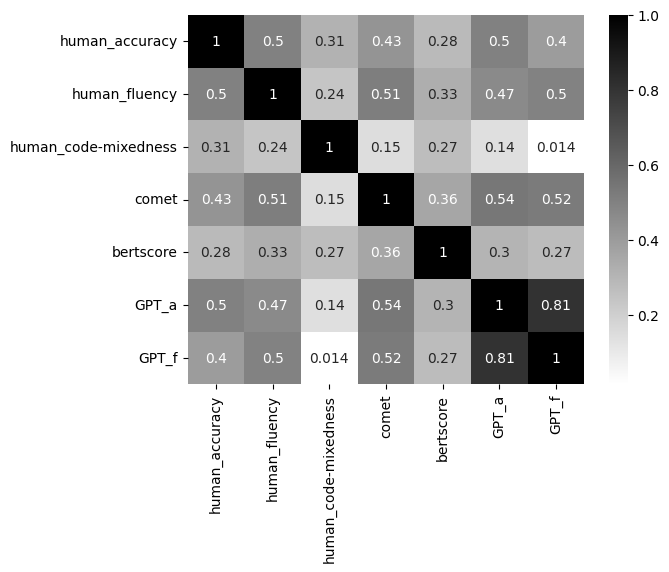

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(corr, cmap='gray_r', annot=True)

In [7]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


3584